# Trabalho Final - Deep Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

Trabalho Final
==============

Criar um classificador de sentimento aplicando técnicas de PLN
--------------------------------------------------------------

Utilizando o dataset de revisões de filmes em português [1], criar um classificador de sentimentos que consiga um score na métrica F1 Score superior a 70%

Devem utilizar uma amostra de 20% e random_state igual a 42 para testar as implementações e mensurar a métrica F1 Score (usar o parâmetro average = 'weighted') o restante dos dados devem ser utilizados para o treinamento (80%). Fique a vontade para testar métodos de pré-processamento, abordagens, algoritmos e bibliotecas, mas explique e justifique suas decisões.

O trabalho poderá ser feito em grupo de até 4 pessoas (mesmos grupos do Startup One).

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/imdb-reviews-pt-br.csv

## Configuração

In [1]:
import warnings
warnings.filterwarnings('ignore')

language = ['text_en','text_pt']

random_state = 42
test_size = 0.2
train_size = 0.8

In [2]:
# Escolha do idioma
exclude = "text_en" # remove a coluna com esse nome
language.remove(exclude)
language = ''.join(language) # necessário converter para string para escolha da coluna do dataframe em formato de série

# Importanto Dataset

In [3]:
# Carregamento do dataset para 'df'
import os
import pandas as pd
try:
  import wget
except:
  !pip install wget

url = "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/imdb-reviews-pt-br.csv"
file = "./" + url.split('/')[-1]

if not os.path.exists(file):
    print("Fazendo download de " + url + " para: " + file)
    wget.download(url,file)

print("Carregando " + file + "...")
# Com skip de linhas para testes:
#df = pd.read_csv(file, delimiter=',', encoding='UTF-8', skiprows = lambda i: i % 10)
df = pd.read_csv(file, delimiter=',', encoding='UTF-8')
print("Dataframe carregado.")

Carregando ./imdb-reviews-pt-br.csv...
Dataframe carregado.


## Conhecendo o Dataset

In [4]:
df.sample(15, random_state = random_state)

,id,text_en,text_pt,sentiment
12532,12534,This was unusual: a modern-day film which was ...,Isso era incomum: um filme moderno que era ult...,pos
35445,35447,Some of my old friends suggested me to watch t...,Alguns dos meus velhos amigos sugeriram que eu...,neg
20279,20281,What a pleasure. This is really a parody. Only...,Que prazer. Isto é realmente uma paródia. Some...,pos
2969,2971,There are about ten minutes about half way thr...,"Há cerca de dez minutos a meio da Strangeland,...",neg
45161,45163,"Othello, the classic Shakespearen story of lov...","Otelo, a clássica história de Shakespearen sob...",pos
42648,42650,"Bravo to Czechs, their once-powerful movie ind...","Bravo para os tchecos, sua outrora poderosa in...",pos
17897,17899,"So its not an award winner, so what? Have you ...","Então não é um vencedor do prêmio, e daí? Você...",pos
41126,41128,Guy Kibbee gives the viewer a lot of laughs. L...,Guy Kibbee dá muitas risadas ao espectador. Co...,pos
47609,47611,A remarkable example of cinematic alchemy at w...,Um exemplo notável de alquimia cinematográfica...,pos
44181,44183,"Steven Spielberg produced, wrote, came up with...","Steven Spielberg produziu, escreveu, surgiu co...",pos


## Verificação de Valores Nulos

In [5]:
df.info()
print("\nValores nulos:")
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         49459 non-null  int64 
 1   text_en    49459 non-null  object
 2   text_pt    49459 non-null  object
 3   sentiment  49459 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB

Valores nulos:


id           0
text_en      0
text_pt      0
sentiment    0
dtype: int64

## Escolha do idioma

In [6]:
# Removendo idioma não desejado
print("Coluna escolhida: " + language) # Coluna selecionada no inicio do notebook
df.drop(exclude, axis=1, inplace=True) # Exclui coluna do idioma não nesejado
df.drop('id', axis=1, inplace=True)    # Exclui coluna 'id'

Coluna escolhida: text_pt


## Amostra do Dataframe escolhido

In [7]:
df.sample(10, random_state = random_state)

,text_pt,sentiment
12532,Isso era incomum: um filme moderno que era ult...,pos
35445,Alguns dos meus velhos amigos sugeriram que eu...,neg
20279,Que prazer. Isto é realmente uma paródia. Some...,pos
2969,"Há cerca de dez minutos a meio da Strangeland,...",neg
45161,"Otelo, a clássica história de Shakespearen sob...",pos
42648,"Bravo para os tchecos, sua outrora poderosa in...",pos
17897,"Então não é um vencedor do prêmio, e daí? Você...",pos
41126,Guy Kibbee dá muitas risadas ao espectador. Co...,pos
47609,Um exemplo notável de alquimia cinematográfica...,pos
44181,"Steven Spielberg produziu, escreveu, surgiu co...",pos


## Porcentagem de Distribuição dos Sentimentos do Dataset

In [8]:
print("Porcentagem de distribuição dos sentimentos")
(df.sentiment.value_counts()/df.shape[0])*100

Porcentagem de distribuição dos sentimentos


neg    50.071777
pos    49.928223
Name: sentiment, dtype: float64

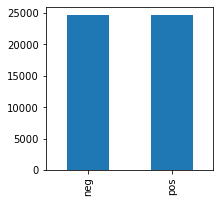

In [9]:

df.sentiment.value_counts().plot(kind='bar', figsize=(3,3));

## Frequência de palavras

In [10]:
from collections import Counter
def frequencia_de_palavras(quantidade, serie):
    c = Counter()
    serie.str.lower().str.split(" ").apply(c.update) # tranforma a descrição em minúsculas e depois separa as pelavras por "<espaço>" e retorna no formato de lista
    return c.most_common(quantidade)
    
# Frequência das 30 palavras mais comuns
frequencia_de_palavras(30,df[language])

[('de', 422154),
 ('que', 327261),
 ('e', 311782),
 ('o', 289805),
 ('a', 241726),
 ('um', 225146),
 ('é', 208453),
 ('não', 142163),
 ('em', 140213),
 ('uma', 136215),
 ('para', 130991),
 ('eu', 120364),
 ('filme', 118212),
 ('do', 102299),
 ('com', 101416),
 ('como', 84989),
 ('os', 84651),
 ('se', 82920),
 ('mas', 76525),
 ('por', 66964),
 ('no', 66093),
 ('da', 62349),
 ('ele', 59772),
 ('mais', 55117),
 ('você', 54950),
 ('muito', 53610),
 ('este', 52544),
 ('na', 48244),
 ('as', 45798),
 ('foi', 45187)]

## Download de Stopwords

In [11]:
# Download de Stopwords
import nltk
import string
nltk.download('stopwords')
if language == 'text_pt':
  stops = nltk.corpus.stopwords.words('portuguese') + list(string.punctuation)
else:
  stops = nltk.corpus.stopwords.words('english') + list(string.punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rizzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Nuvem de Palavras Positivas e Negativas

Building string of words (positive)...
Building string of words (negative)...
Building wordcloud...


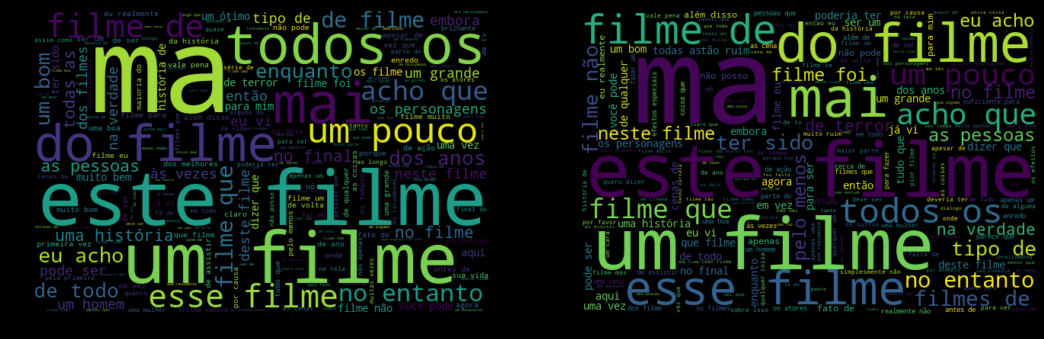

In [12]:

import nltk
import matplotlib.pyplot as plt

try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud

# Coluna do dataframe
#df_col_text = df.[language] # Coluna <language>

# Filtra coluna por <sentimento>
df_col_text_pos = df[df.sentiment == 'pos'][language]
df_col_text_neg = df[df.sentiment == 'neg'][language]

def words(dataframe):
  __words = ''
  for row in dataframe:
    text = row.lower() # normalizando: transforma todo o texto da linha em minusculo
    for word in text: # adiciona palavra de cada linha na variavel words
      __words += word
  return __words


print("Building string of words (positive)...")
words_pos = words(df_col_text_pos)
print("Building string of words (negative)...")
words_neg = words(df_col_text_neg)

print("Building wordcloud...")
# Gera o wordcloud
wordcloud_pos = WordCloud(stopwords = stops, width=600, height=400).generate(words_pos)
wordcloud_neg = WordCloud(stopwords = stops, width=600, height=400).generate(words_neg)

# Plota wordcloud
f = plt.figure(figsize=(18,18), facecolor='k')
f.add_subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear');
f.add_subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear');

## Exemplo Tokenização

In [13]:
from nltk.tokenize import word_tokenize
import nltk
# Adiciona coluna de tokens
df["tokens_" + language] = df[language].apply(word_tokenize)
df.sample(10, random_state = random_state)

,text_pt,sentiment,tokens_text_pt
12532,Isso era incomum: um filme moderno que era ult...,pos,"[Isso, era, incomum, :, um, filme, moderno, qu..."
35445,Alguns dos meus velhos amigos sugeriram que eu...,neg,"[Alguns, dos, meus, velhos, amigos, sugeriram,..."
20279,Que prazer. Isto é realmente uma paródia. Some...,pos,"[Que, prazer, ., Isto, é, realmente, uma, paró..."
2969,"Há cerca de dez minutos a meio da Strangeland,...",neg,"[Há, cerca, de, dez, minutos, a, meio, da, Str..."
45161,"Otelo, a clássica história de Shakespearen sob...",pos,"[Otelo, ,, a, clássica, história, de, Shakespe..."
42648,"Bravo para os tchecos, sua outrora poderosa in...",pos,"[Bravo, para, os, tchecos, ,, sua, outrora, po..."
17897,"Então não é um vencedor do prêmio, e daí? Você...",pos,"[Então, não, é, um, vencedor, do, prêmio, ,, e..."
41126,Guy Kibbee dá muitas risadas ao espectador. Co...,pos,"[Guy, Kibbee, dá, muitas, risadas, ao, especta..."
47609,Um exemplo notável de alquimia cinematográfica...,pos,"[Um, exemplo, notável, de, alquimia, cinematog..."
44181,"Steven Spielberg produziu, escreveu, surgiu co...",pos,"[Steven, Spielberg, produziu, ,, escreveu, ,, ..."


# Modelo

## Ajuste coluna sentimento

In [14]:
df.sentiment = df['sentiment'].map({'pos': 1, 'neg': 0})
df.sample(10, random_state = random_state)

,text_pt,sentiment,tokens_text_pt
12532,Isso era incomum: um filme moderno que era ult...,1,"[Isso, era, incomum, :, um, filme, moderno, qu..."
35445,Alguns dos meus velhos amigos sugeriram que eu...,0,"[Alguns, dos, meus, velhos, amigos, sugeriram,..."
20279,Que prazer. Isto é realmente uma paródia. Some...,1,"[Que, prazer, ., Isto, é, realmente, uma, paró..."
2969,"Há cerca de dez minutos a meio da Strangeland,...",0,"[Há, cerca, de, dez, minutos, a, meio, da, Str..."
45161,"Otelo, a clássica história de Shakespearen sob...",1,"[Otelo, ,, a, clássica, história, de, Shakespe..."
42648,"Bravo para os tchecos, sua outrora poderosa in...",1,"[Bravo, para, os, tchecos, ,, sua, outrora, po..."
17897,"Então não é um vencedor do prêmio, e daí? Você...",1,"[Então, não, é, um, vencedor, do, prêmio, ,, e..."
41126,Guy Kibbee dá muitas risadas ao espectador. Co...,1,"[Guy, Kibbee, dá, muitas, risadas, ao, especta..."
47609,Um exemplo notável de alquimia cinematográfica...,1,"[Um, exemplo, notável, de, alquimia, cinematog..."
44181,"Steven Spielberg produziu, escreveu, surgiu co...",1,"[Steven, Spielberg, produziu, ,, escreveu, ,, ..."


## Removendo Stopwords

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
# Já faz tokenização e normalização
vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df[language])
text_vect = vect.transform(df[language])
print("Unigramas com stopwords: ", text_vect.shape[1])

vect = CountVectorizer(ngram_range=(1,1), stop_words=stops)
vect.fit(df[language])
text_vect = vect.transform(df[language])
print("Unigramas com stopwords removidas: ", text_vect.shape[1])

Unigramas com stopwords:  129621
Unigramas com stopwords removidas:  129446


## Separação em Conjunto de Treino e Teste

In [16]:
# Separando em conjunto de treino e teste
from sklearn.model_selection import train_test_split
# X = avaliacao
# y = sentimento
X_train, X_test, y_train, y_test = train_test_split(text_vect, df.sentiment, test_size = test_size, random_state = random_state)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(39567, 129446)
(39567,)
(9892, 129446)
(9892,)


## Modelo de Regressão Logística

In [17]:
# Regressão logística é um modelo bom para classificação binária
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, solver='newton-cg')
lr = lr.fit(X_train, y_train)

# F1
from sklearn.metrics import f1_score
y_predict = lr.predict(X_test)
f1 = f1_score(y_predict, y_test, average='weighted')
print("O valor de F1 para Regressão Logística é: ", end='')
print(f1)

O valor de F1 para Regressão Logística é: 0.8795904431086706


## Modelo SVM

In [18]:
# SVM
from sklearn.svm import LinearSVC
svm = LinearSVC(C=10, random_state=random_state)
svm.fit(X_train, y_train)

# F1
from sklearn.metrics import f1_score
y_predict = svm.predict(X_test)
f1 = f1_score(y_predict, y_test, average='weighted')
print("O valor de F1 Para SVM é: ", end='')
print(f1)


O valor de F1 Para SVM é: 0.8591680014041314
